In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
import mglearn 

c:\users\nitin mali\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
c:\users\nitin mali\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
import os
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(
adult_path, header=None, index_col=False,
names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
'marital-status', 'occupation', 'relationship', 'race', 'gender',
'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
'income'])
# For illustration purposes, we only select some of the columns
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
'occupation', 'income']]
# IPython.display allows nice output formatting within the Jupyter notebook
display(data.head())


,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [4]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [5]:

#using pandas 
print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [6]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Extract NumPy arrays
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

c:\users\nitin mali\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test score: 0.81


In [8]:
#using sklearn

# create a DataFrame with an integer feature and a categorical string feature
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [9]:
'''Using get_dummies will only encode the string feature and will not change the integer
feature, as you can see'''

'Using get_dummies will only encode the string feature and will not change the integer\nfeature, as you can see'

In [10]:
display(pd.get_dummies(demo_df))

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [ ]:
'''If you want dummy variables to be created for the “Integer Feature” column, you can
explicitly list the columns you want to encode using the columns parameter. Then,
both features will be treated as categorical (see Table 4-6):'''

In [14]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
display(pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature']))

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
Integer Feature        4 non-null int64
Categorical Feature    4 non-null object
dtypes: int64(1), object(1)
memory usage: 144.0+ bytes


In [ ]:
#binning , discretization , Linear models and trees
'''The best way to represent data depends not only on the semantics of the data, but also
on the kind of model you are using. Linear models and tree-based models (such as
decision trees, gradient boosted trees, and random forests), two large and very commonly
used families, have very different properties when it comes to how they work
with different feature representations. Let’s go back to the wave regression dataset that
we used in Chapter 2. It has only a single input feature. Here is a comparison of a
linear regression model and a decision tree regressor on this dataset (see Figure 4-1):'''


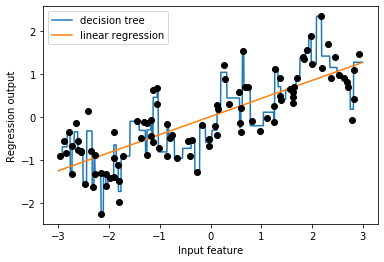

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [ ]:
'''As you know, linear models can only model linear relationships, which are lines in
the case of a single feature. The decision tree can build a much more complex model
of the data. However, this is strongly dependent on the representation of the data.
One way to make linear models more powerful on continuous data is to use binning
(also known as discretization) of the feature to split it up into multiple features, as
described here.'''

In [ ]:
'''We imagine a partition of the input range for the feature (in this case, the numbers
from –3 to 3) into a fixed number of bins—say, 10. A data point will then be represented
by which bin it falls into. To determine this, we first have to define the bins. In
this case, we’ll define 10 bins equally spaced between –3 and 3. We use the
np.linspace function for this, creating 11 entries, which will create 10 bins—they are
the spaces in between two consecutive boundaries:'''

In [17]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [ ]:
'''Here, the first bin contains all data points with feature values –3 to –2.4, the second
bin contains all points with feature values from –2.4 to –1.8, and so on.
Next, we record for each data point which bin it falls into. This can be easily computed
using the np.digitize function:'''

In [18]:
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [ ]:
'''What we did here is transform the single continuous input feature in the wave dataset
into a categorical feature that encodes which bin a data point is in. To use a scikitlearn
model on this data, we transform this discrete feature to a one-hot encoding
using the OneHotEncoder from the preprocessing module. The OneHotEncoder does
the same encoding as pandas.get_dummies, though it currently only works on categorical
variables that are integers:'''

In [22]:
from sklearn.preprocessing import OneHotEncoder
# transform using the OneHotEncoder
encoder = OneHotEncoder(sparse=False,categories="auto")
# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)
# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [23]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


In [ ]:
'''Now we build a new linear regression model and a new decision tree model on the
one-hot-encoded data. The result is visualized in Figure 4-2, together with the bin
boundaries, shown as dotted black lines:'''

Text(0.5, 0, 'Input feature')

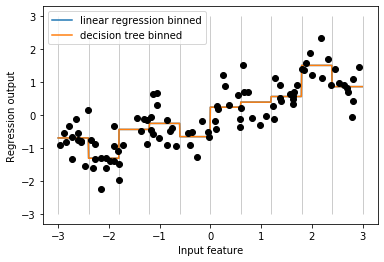

In [24]:
line_binned = encoder.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

In [ ]:
'''If there are good reasons to use a linear model for a particular dataset—say, because it
is very large and high-dimensional, but some features have nonlinear relations with
the output—binning can be a great way to increase modeling power.'''

In [28]:
#interaction and polynomials

'''Another way to enrich a feature representation, particularly for linear models, is
adding interaction features and polynomial features of the original data. This kind of
feature engineering is often used in statistical modeling, but it’s also common in many
practical machine learning applications.
As a first example, look again at Figure 4-2. The linear model learned a constant value
for each bin in the wave dataset. We know, however, that linear models can learn not
only offsets, but also slopes. One way to add a slope to the linear model on the binned
data is to add the original feature (the x-axis in the plot) back in. This leads to an 11-
dimensional dataset, as seen in Figure 4-3:'''

'Another way to enrich a feature representation, particularly for linear models, is\nadding interaction features and polynomial features of the original data. This kind of\nfeature engineering is often used in statistical modeling, but it’s also common in many\npractical machine learning applications.\nAs a first example, look again at Figure 4-2. The linear model learned a constant value\nfor each bin in the wave dataset. We know, however, that linear models can learn not\nonly offsets, but also slopes. One way to add a slope to the linear model on the binned\ndata is to add the original feature (the x-axis in the plot) back in. This leads to an 11-\ndimensional dataset, as seen in Figure 4-3:'

In [29]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


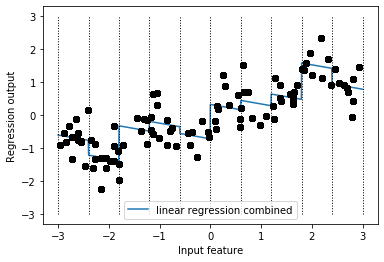

In [37]:
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)
    plt.legend(loc="best")
    plt.ylabel("Regression output")
    plt.xlabel("Input feature")
    plt.plot(X[:, 0], y, 'o', c='k')

In [ ]:
'''In this example, the model learned an offset for each bin, together with a slope. The
learned slope is downward, and shared across all the bins—there is a single x-axis feature,
which has a single slope. Because the slope is shared across all bins, it doesn’t
seem to be very helpful. We would rather have a separate slope for each bin! We can
achieve this by adding an interaction or product feature that indicates which bin a
data point is in and where it lies on the x-axis. This feature is a product of the bin
indicator and the original feature. Let’s create this dataset:'''

In [40]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


In [ ]:
'''The dataset now has 20 features: the indicators for which bin a data point is in, and a
product of the original feature and the bin indicator. You can think of the product feature as a separate copy of the x-axis feature for each bin. It is the original feature
within the bin, and zero everywhere else. Figure 4-4 shows the result of the linear
model on this new representation:'''

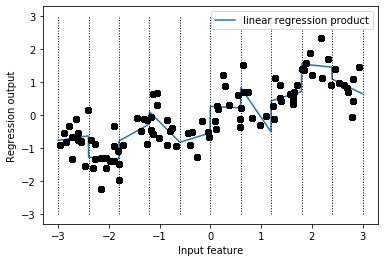

In [44]:
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)
    plt.plot(X[:, 0], y, 'o', c='k')
    plt.ylabel("Regression output")
    plt.xlabel("Input feature")
    plt.legend(loc="best")

In [ ]:
'''As you can see, now each bin has its own offset and slope in this model.'''

In [ ]:
'''Using binning is one way to expand a continuous feature. Another one is to use polynomials
of the original features. For a given feature x, we might want to consider
x ** 2, x ** 3, x ** 4, and so on. This is implemented in PolynomialFeatures in
the preprocessing module:'''

In [47]:
from sklearn.preprocessing import PolynomialFeatures
# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [48]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


In [52]:
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [53]:
'''You can obtain the semantics of the features by calling the get_feature_names
method, which provides the exponent for each feature:'''

'You can obtain the semantics of the features by calling the get_feature_names\nmethod, which provides the exponent for each feature:'

In [54]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


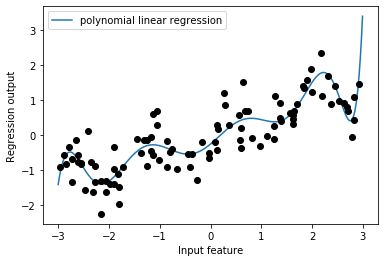

In [55]:
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

'Figure 4-6. Comparison of different gamma parameters for an SVM with RBF kernel\nUsing a more complex model, a kernel SVM, we are able to learn a similarly complex\nprediction to the polynomial regression without an explicit transformation of the\nfeatures.'

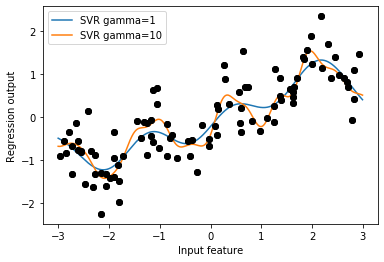

In [59]:

'''As a comparison, here is a kernel SVM model learned on the original data, without
any transformation (see Figure 4-6):'''
from sklearn.svm import SVR
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    plt.plot(X[:, 0], y, 'o', c='k')
    plt.ylabel("Regression output")
    plt.xlabel("Input feature")
    plt.legend(loc="best")
    
'''Figure 4-6. Comparison of different gamma parameters for an SVM with RBF kernel
Using a more complex model, a kernel SVM, we are able to learn a similarly complex
prediction to the polynomial regression without an explicit transformation of the
features.'''

In [ ]:
'''As a more realistic application of interactions and polynomials, let’s look again at the
Boston Housing dataset. We already used polynomial features on this dataset in
Chapter 2. Now let’s have a look at how these features were constructed, and at how
much the polynomial features help. First we load the data, and rescale it to be
between 0 and 1 using MinMaxScaler:'''

In [60]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
boston.data, boston.target, random_state=0)
# rescale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [62]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [64]:
'''Let’s compare the performance using Ridge on the data with and without interactions:'''

from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(
ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


In [ ]:
'''Clearly, the interactions and polynomial features gave us a good boost in performance
when using Ridge. When using a more complex model like a random forest,
the story is a bit different, though:'''

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.783
Score with interactions: 0.766


In [ ]:
'''You can see that even without additional features, the random forest beats the
performance of Ridge. Adding interactions and polynomials actually decreases performance
slightly.'''

In [ ]:
#Univariate NonLinear Transformations

'''Univariate Nonlinear Transformations
We just saw that adding squared or cubed features can help linear models for regression.
There are other transformations that often prove useful for transforming certain
features: in particular, applying mathematical functions like log, exp, or sin. While
tree-based models only care about the ordering of the features, linear models and
neural networks are very tied to the scale and distribution of each feature, and if there
is a nonlinear relation between the feature and the target, that becomes hard to model
—particularly in regression. The functions log and exp can help by adjusting the relative
scales in the data so that they can be captured better by a linear model or neural
network. We saw an application of that in Chapter 2 with the memory price data. The
sin and cos functions can come in handy when dealing with data that encodes periodic
patterns.
Most models work best when each feature (and in regression also the target) is loosely
Gaussian distributed—that is, a histogram of each feature should have something
resembling the familiar “bell curve” shape. Using transformations like log and exp is
a hacky but simple and efficient way to achieve this. A particularly common case
when such a transformation can be helpful is when dealing with integer count data.
By count data, we mean features like “how often did user A log in?” Counts are never
negative, and often follow particular statistical patterns. We are using a synthetic
dataset of counts here that has properties similar to those you can find in the wild.
The features are all integer-valued, while the response is continuous'

In [66]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [ ]:
'''Let’s look at the first 10 entries of the first feature. All are integer values and positive,
but apart from that it’s hard to make out a particular pattern.
If we count the appearance of each value, the distribution of values becomes clearer:'''

In [77]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


In [ ]:
'''The value 2 seems to be the most common, with 68 appearances (bincount always
starts at 0), and the counts for higher values fall quickly. However, there are some
very high values, like 84 and 85, that are appearing twice. We visualize the counts in'''

Text(0.5, 0, 'Value')

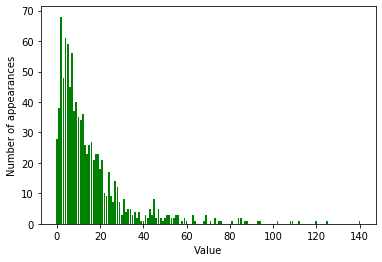

In [94]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='g')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [ ]:
'''Features X[:, 1] and X[:, 2] have similar properties. This kind of distribution of
values (many small ones and a few very large ones) is very common in practice.1
However, it is something most linear models can’t handle very well. Let’s try to fit a
ridge regression to this model:'''

In [95]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


In [ ]:
'''As you can see from the relatively low R2 score, Ridge was not able to really capture
the relationship between X and y. Applying a logarithmic transformation can help,
though. Because the value 0 appears in the data (and the logarithm is not defined at
0), we can’t actually just apply log, but we have to compute log(X + 1):'''

In [96]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Value')

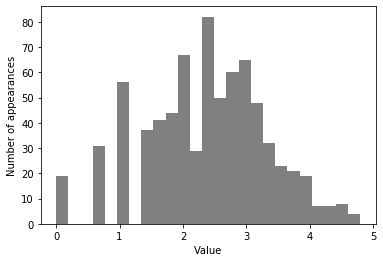

In [97]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [98]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


In [ ]:
'''Finding the transformation that works best for each combination of dataset and
model is somewhat of an art. In this example, all the features had the same properties.
This is rarely the case in practice, and usually only a subset of the features should be
transformed, or sometimes each feature needs to be transformed in a different way.
As we mentioned earlier, these kinds of transformations are irrelevant for tree-based
models but might be essential for linear models. Sometimes it is also a good idea to
transform the target variable y in regression. Trying to predict counts (say, number of
orders) is a fairly common task, and using the log(y + 1) transformation often
helps.2'''

In [ ]:

#feature selection
'''With so many ways to create new features, you might get tempted to increase the
dimensionality of the data way beyond the number of original features. However,
adding more features makes all models more complex, and so increases the chance of
overfitting. When adding new features, or with high-dimensional datasets in general,
it can be a good idea to reduce the number of features to only the most useful ones,
and discard the rest. This can lead to simpler models that generalize better. But how
can you know how good each feature is? There are three basic strategies: univariate
statistics, model-based selection, and iterative selection. We will discuss all three of
them in detail. All of these methods are supervised methods, meaning they need the
target for fitting the model. This means we need to split the data into training and test
sets, and fit the feature selection only on the training part of the data.'''

In [99]:
'''Univariate Statistics
In univariate statistics, we compute whether there is a statistically significant relationship
between each feature and the target. Then the features that are related with the
highest confidence are selected. In the case of classification, this is also known as
analysis of variance (ANOVA). A key property of these tests is that they are univariate,
meaning that they only consider each feature individually. Consequently, a feature
will be discarded if it is only informative when combined with another feature.
Univariate tests are often very fast to compute, and don’t require building a model.
On the other hand, they are completely independent of the model that you might
want to apply after the feature selection.
To use univariate feature selection in scikit-learn, you need to choose a test, usually
either f_classif (the default) for classification or f_regression for regression,
and a method to discard features based on the p-values determined in the test. All
methods for discarding parameters use a threshold to discard all features with too
high a p-value (which means they are unlikely to be related to the target). The methods
differ in how they compute this threshold, with the simplest ones being SelectKB
est, which selects a fixed number k of features, and SelectPercentile, which selects
a fixed percentage of features. Let’s apply the feature selection for classification on the cancer dataset. To make the task a bit harder, we’ll add some noninformative noise
features to the data. We expect the feature selection to be able to identify the features
that are noninformative and remove them:'''

'Univariate Statistics\nIn univariate statistics, we compute whether there is a statistically significant relationship\nbetween each feature and the target. Then the features that are related with the\nhighest confidence are selected. In the case of classification, this is also known as\nanalysis of variance (ANOVA). A key property of these tests is that they are univariate,\nmeaning that they only consider each feature individually. Consequently, a feature\nwill be discarded if it is only informative when combined with another feature.\nUnivariate tests are often very fast to compute, and don’t require building a model.\nOn the other hand, they are completely independent of the model that you might\nwant to apply after the feature selection.\nTo use univariate feature selection in scikit-learn, you need to choose a test, usually\neither f_classif (the default) for classification or f_regression for regression,\nand a method to discard features based on the p-values determined in the t

In [100]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(
X_w_noise, cancer.target, random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


In [ ]:
'''As you can see, the number of features was reduced from 80 to 40 (50 percent of the
original number of features). We can find out which features have been selected using
the get_support method, which returns a Boolean mask of the selected features
(visualized in Figure 4-9):'''

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([], <a list of 0 Text yticklabel objects>)

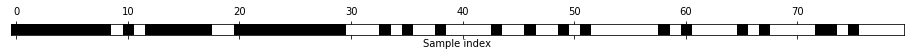

In [103]:
mask = select.get_support()
print(mask)
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [108]:
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
        True,  True, False,  True, False, False, False, False])

In [ ]:
'''As you can see from the visualization of the mask, most of the selected features are
the original features, and most of the noise features were removed. However, the
recovery of the original features is not perfect. Let’s compare the performance of
logistic regression on all features against the performance using only the selected
features:'''

In [109]:
from sklearn.linear_model import LogisticRegression
# transform test data
X_test_selected = select.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
lr.score(X_test_selected, y_test)))

Score with all features: 0.930
Score with only selected features: 0.940


c:\users\nitin mali\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\nitin mali\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [110]:
'''In this case, removing the noise features improved performance, even though some
of the original features were lost. This was a very simple synthetic example, and outcomes
on real data are usually mixed. Univariate feature selection can still be very
helpful, though, if there is such a large number of features that building a model on
them is infeasible, or if you suspect that many features are completely uninformative.'''

'In this case, removing the noise features improved performance, even though some\nof the original features were lost. This was a very simple synthetic example, and outcomes\non real data are usually mixed. Univariate feature selection can still be very\nhelpful, though, if there is such a large number of features that building a model on\nthem is infeasible, or if you suspect that many features are completely uninformative.'

In [111]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
RandomForestClassifier(n_estimators=100, random_state=42),
threshold="median")

In [ ]:
'''The SelectFromModel class selects all features that have an importance measure of
the feature (as provided by the supervised model) greater than the provided threshold.
To get a comparable result to what we got with univariate feature selection, we
used the median as a threshold, so that half of the features will be selected. We use a
random forest classifier with 100 trees to compute the feature importances. This is a
quite complex model and much more powerful than using univariate tests. Now let’s
actually fit the model:'''

In [112]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


([], <a list of 0 Text yticklabel objects>)

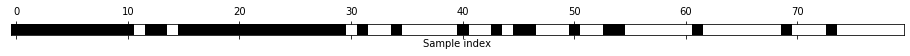

In [113]:
mask = select.get_support()
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [ ]:
'''This time, all but two of the original features were selected. Because we specified to
select 40 features, some of the noise features are also selected. Let’s take a look at the
performance:'''

In [114]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


c:\users\nitin mali\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [115]:
#Iterative Feature Selection
'''
In univariate testing we used no model, while in model-based selection we used a single
model to select features. In iterative feature selection, a series of models are built,
with varying numbers of features. There are two basic methods: starting with no features
and adding features one by one until some stopping criterion is reached, or
starting with all features and removing features one by one until some stopping criterion
is reached. Because a series of models are built, these methods are much more
computationally expensive than the methods we discussed previously. One particular
method of this kind is recursive feature elimination (RFE), which starts with all features,
builds a model, and discards the least important feature according to the
model. Then a new model is built using all but the discarded feature, and so on until
only a prespecified number of features are left. For this to work, the model used for
selection needs to provide some way to determine feature importance, as was the case
for the model-based selection. Here, we use the same random forest model that we
used earlier, and get the results shown in Figure 4-11:'''

'\nIn univariate testing we used no model, while in model-based selection we used a single\nmodel to select features. In iterative feature selection, a series of models are built,\nwith varying numbers of features. There are two basic methods: starting with no features\nand adding features one by one until some stopping criterion is reached, or\nstarting with all features and removing features one by one until some stopping criterion\nis reached. Because a series of models are built, these methods are much more\ncomputationally expensive than the methods we discussed previously. One particular\nmethod of this kind is recursive feature elimination (RFE), which starts with all features,\nbuilds a model, and discards the least important feature according to the\nmodel. Then a new model is built using all but the discarded feature, and so on until\nonly a prespecified number of features are left. For this to work, the model used for\nselection needs to provide some way to determine feature

([], <a list of 0 Text yticklabel objects>)

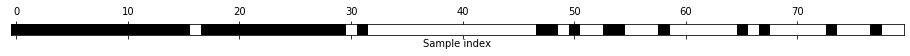

In [116]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
n_features_to_select=40)
select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [ ]:
'''The feature selection got better compared to the univariate and model-based selection,
but one feature was still missed. Running this code also takes significantly longer
than that for the model-based selection, because a random forest model is trained 40
times, once for each feature that is dropped. Let’s test the accuracy of the logistic
regression model when using RFE for feature selection:'''

In [117]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


c:\users\nitin mali\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
'''We can also use the model used inside the RFE to make predictions. This uses only
the feature set that was selected:'''

In [118]:
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.951


In [ ]:
'''Here, the performance of the random forest used inside the RFE is the same as that
achieved by training a logistic regression model on top of the selected features. In
other words, once we’ve selected the right features, the linear model performs as well
as the random forest.
If you are unsure when selecting what to use as input to your machine learning algorithms,
automatic feature selection can be quite helpful. It is also great for reducing
the amount of features needed—for example, to speed up prediction or to allow for
more interpretable models. In most real-world cases, applying feature selection is
unlikely to provide large gains in performance. However, it is still a valuable tool in
the toolbox of the feature engineer.'''

In [ ]:
'''Utilizing Expert Knowledge
Feature engineering is often an important place to use expert knowledge for a particular
application. While the purpose of machine learning in many cases is to avoid having
to create a set of expert-designed rules, that doesn’t mean that prior knowledge of
the application or domain should be discarded. Often, domain experts can help in
identifying useful features that are much more informative than the initial representation
of the data. Imagine you work for a travel agency and want to predict flight
prices. Let’s say you have a record of prices together with dates, airlines, start locations,
and destinations. A machine learning model might be able to build a decent
model from that. Some important factors in flight prices, however, cannot be learned.
For example, flights are usually more expensive during peak vacation months and
around holidays. While the dates of some holidays (like Christmas) are fixed, and
their effect can therefore be learned from the date, others might depend on the phases
of the moon (like Hanukkah and Easter) or be set by authorities (like school holidays).
These events cannot be learned from the data if each flight is only recorded
using the (Gregorian) date. However, it is easy to add a feature that encodes whether a
flight was on, preceding, or following a public or school holiday. In this way, prior
knowledge about the nature of the task can be encoded in the features to aid a
machine learning algorithm. Adding a feature does not force a machine learning
algorithm to use it, and even if the holiday information turns out to be noninformative
for flight prices, augmenting the data with this information doesn’t hurt.
We’ll now look at one particular case of using expert knowledge—though in this'''

In [ ]:
'''We’ll now look at one particular case of using expert knowledge—though in this case
it might be more rightfully called “common sense.” The task is predicting bicycle rentals
in front of Andreas’s house.
In New York, Citi Bike operates a network of bicycle rental stations with a subscription
system. The stations are all over the city and provide a convenient way to get
around. Bike rental data is made public in an anonymized form and has been analyzed
in various ways. The task we want to solve is to predict for a given time and day
how many people will rent a bike in front of Andreas’s house—so he knows if any
bikes will be left for him.'''

In [119]:
citibike = mglearn.datasets.load_citibike()

In [120]:
print("Citi Bike data:\n{}".format(citibike.head()))

Citi Bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


c:\users\nitin mali\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Rentals')

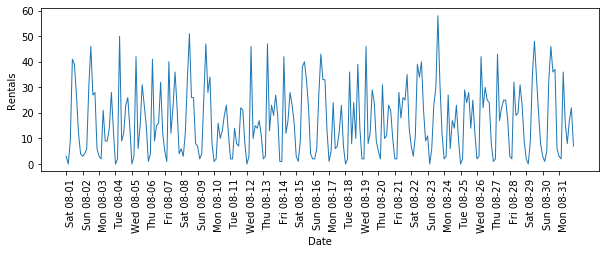

In [121]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

In [ ]:
'''Looking at the data, we can clearly distinguish day and night for each 24-hour interval.
The patterns for weekdays and weekends also seem to be quite different. When
evaluating a prediction task on a time series like this, we usually want to learn from
the past and predict for the future. This means when doing a split into a training and a
test set, we want to use all the data up to a certain date as the training set and all the
data past that date as the test set. This is how we would usually use time series prediction:
given everything that we know about rentals in the past, what do we think will'''

In [ ]:
'''happen tomorrow? We will use the first 184 data points, corresponding to the first 23
days, as our training set, and the remaining 64 data points, corresponding to the
remaining 8 days, as our test set.
The only feature that we are using in our prediction task is the date and time when a
particular number of rentals occurred. So, the input feature is the date and time—say,
2015-08-01 00:00:00—and the output is the number of rentals in the following
three hours (three in this case, according to our DataFrame).
A (surprisingly) common way that dates are stored on computers is using POSIX
time, which is the number of seconds since January 1970 00:00:00 (aka the beginning
of Unix time). As a first try, we can use this single integer feature as our data representation:'''

In [122]:
# extract the target values (number of rentals)
y = citibike.values
# convert to POSIX time by dividing by 10**9
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

In [124]:
# use the first 184 data points for training, and the rest for testing
n_train = 184
# function to evaluate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
    # split the given features into a training and a test set
    X_train, X_test = features[:n_train], features[n_train:]
    # also split the target array
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,
    ha="left")
    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
    label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test-set R^2: -0.04


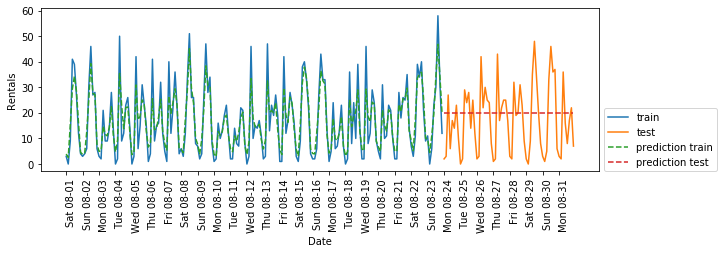

In [125]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

In [ ]:
'''The predictions on the training set are quite good, as is usual for random forests.
However, for the test set, a constant line is predicted. The R2 is –0.04, which means
that we learned nothing. What happened?
The problem lies in the combination of our feature and the random forest. The value
of the POSIX time feature for the test set is outside of the range of the feature values
in the training set: the points in the test set have timestamps that are later than all the
points in the training set. Trees, and therefore random forests, cannot extrapolate to
feature ranges outside the training set. The result is that the model simply predicts the
target value of the closest point in the training set—which is the last time it observed
any data.
Clearly we can do better than this. This is where our “expert knowledge” comes in.
From looking at the rental figures in the training data, two factors seem to be very
important: the time of day and the day of the week. So, let’s add these two features.
We can’t really learn anything from the POSIX time, so we drop that feature. First,
let’s use only the hour of the day. As Figure 4-14 shows, now the predictions have the
same pattern for each day of the week:'''

Test-set R^2: 0.60


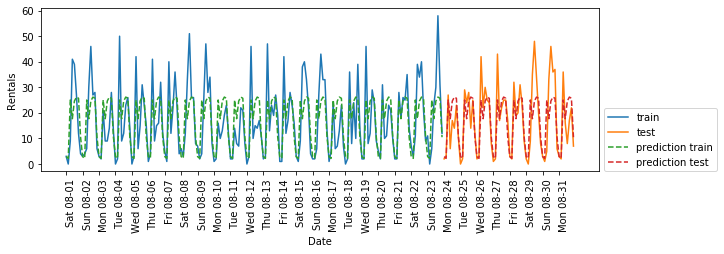

In [126]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

In [ ]:
'''Figure 4-14. Predictions made by a random forest using only the hour of the day
The R2 is already much better, but the predictions clearly miss the weekly pattern.
Now let’s also add the day of the week (see Figure 4-15):'''

Test-set R^2: 0.84


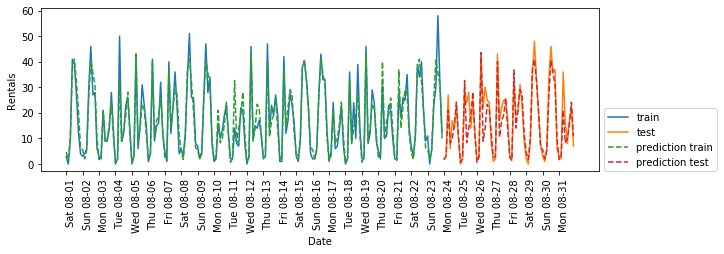

In [128]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

In [ ]:
'''Now we have a model that captures the periodic behavior by considering the day of
week and time of day. It has an R2 of 0.84, and shows pretty good predictive performance.
What this model likely is learning is the mean number of rentals for each
combination of weekday and time of day from the first 23 days of August. This
actually does not require a complex model like a random forest, so let’s try with a
simpler model, LinearRegression'''

Test-set R^2: 0.13


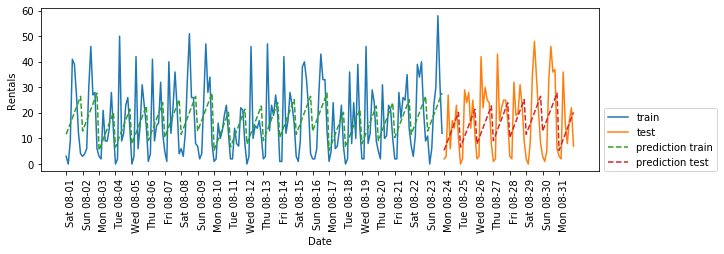

In [131]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

In [ ]:
'''LinearRegression works much worse, and the periodic pattern looks odd. The reason
for this is that we encoded day of week and time of day using integers, which are
interpreted as continuous variables. Therefore, the linear model can only learn a linear
function of the time of day—and it learned that later in the day, there are more
rentals. However, the patterns are much more complex than that. We can capture this
by interpreting the integers as categorical variables, by transforming them using One
HotEncoder (see Figure 4-17):'''

In [132]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

c:\users\nitin mali\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Test-set R^2: 0.62


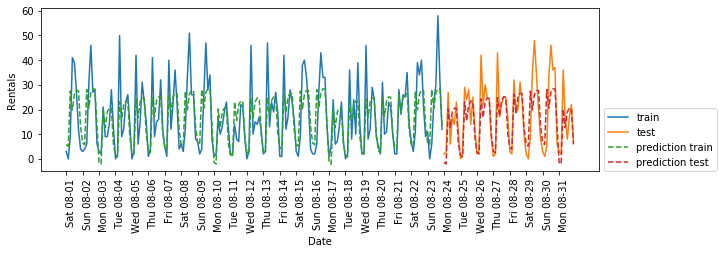

In [137]:
eval_on_features(X_hour_week_onehot, y, Ridge())

In [ ]:
'''This gives us a much better match than the continuous feature encoding. Now the
linear model learns one coefficient for each day of the week, and one coefficient for
each time of the day. That means that the “time of day” pattern is shared over all days
of the week, though.'''

In [ ]:
'''Using interaction features, we can allow the model to learn one coefficient for each
combination of day and time of day'''

Test-set R^2: 0.85


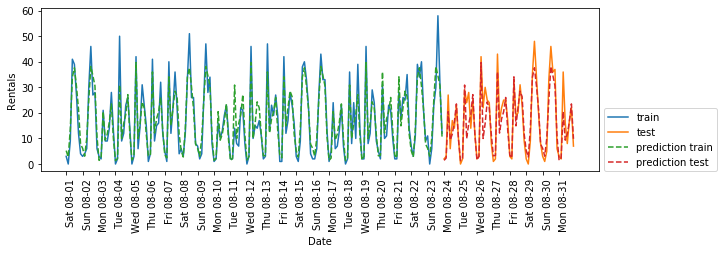

In [138]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [ ]:
'''This transformation finally yields a model that performs similarly well to the random
forest. A big benefit of this model is that it is very clear what is learned: one coefficient
for each day and time. We can simply plot the coefficients learned by the model,
something that would not be possible for the random forest.
First, we create feature names for the hour and day features:'''

In [141]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day + hour

In [ ]:
'''Then we name all the interaction features extracted by PolynomialFeatures, using
the get_feature_names method, and keep only the features with nonzero coefficients:
In[61]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]'''

In [143]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0, 0.5, 'Feature magnitude')

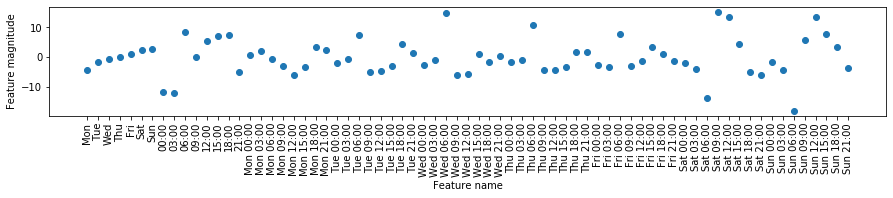

In [148]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude")

In [ ]:
'''In this chapter, we discussed how to deal with different data types (in particular, with
categorical variables). We emphasized the importance of representing data in a way
that is suitable for the machine learning algorithm—for example, by one-hotencoding
categorical variables. We also discussed the importance of engineering new
features, and the possibility of utilizing expert knowledge in creating derived features
from your data. In particular, linear models might benefit greatly from generating
new features via binning and adding polynomials and interactions, while more complex,
nonlinear models like random forests and SVMs might be able to learn more
complex tasks without explicitly expanding the feature space. In practice, the features
that are used (and the match between features and method) is often the most important
piece in making a machine learning approach work well.
Now that you have a good idea of how to represent your data in an appropriate way
and which algorithm to use for which task, the next chapter will focus on evaluating
the performance of machine learning models and selecting the right parameter
settings.'''